<a href="https://colab.research.google.com/github/NirjharDebnath/Machine-Learning/blob/main/Classical_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classical Machine Learning Models

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd



## List of classical machine learning models

### **Regression Models**
1. **Linear Regression**
2. **Logistic Regression**
3. **Ridge Regression**
4. **Lasso Regression**
5. **Elastic Net Regression**
6. **Random Forest Regression**
7. **Support Vector Machines Regression**

### **Classification Models**
6. **k-Nearest Neighbors (k-NN)**
7. **Support Vector Machines (SVM)**
8. **Naïve Bayes**
9. **Decision Trees**
10. **Random Forest**
11. **Gradient Boosting Machines (GBM)**  
   - Includes models like XGBoost, LightGBM, and CatBoost.

### **Clustering Models**
12. **k-Means Clustering**
13. **Hierarchical Clustering**
14. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
15. **Gaussian Mixture Models (GMM)**

### **Dimensionality Reduction**
16. **Principal Component Analysis (PCA)**
17. **t-Distributed Stochastic Neighbor Embedding (t-SNE)**
18. **Linear Discriminant Analysis (LDA)**
19. **Factor Analysis**
20. **Independent Component Analysis (ICA)**

### **Ensemble Methods**
21. **Bagging (e.g., Bagged Trees)**
22. **Boosting (e.g., AdaBoost, Gradient Boosting)**
23. **Stacking**

### **Anomaly Detection**
24. **Isolation Forest**
25. **One-Class SVM**

### **Recommendation Systems**
26. **Collaborative Filtering**
27. **Matrix Factorization**

### **Other Classical Algorithms**
28. **Perceptron**
29. **Gaussian Processes**
30. **Markov Models (e.g., Hidden Markov Model)**

 😊

## Regression


#### Data

In [ ]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing(as_frame=True)
data = dataset.frame
x, y = data["Latitude"], data["Longitude"]

In [ ]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


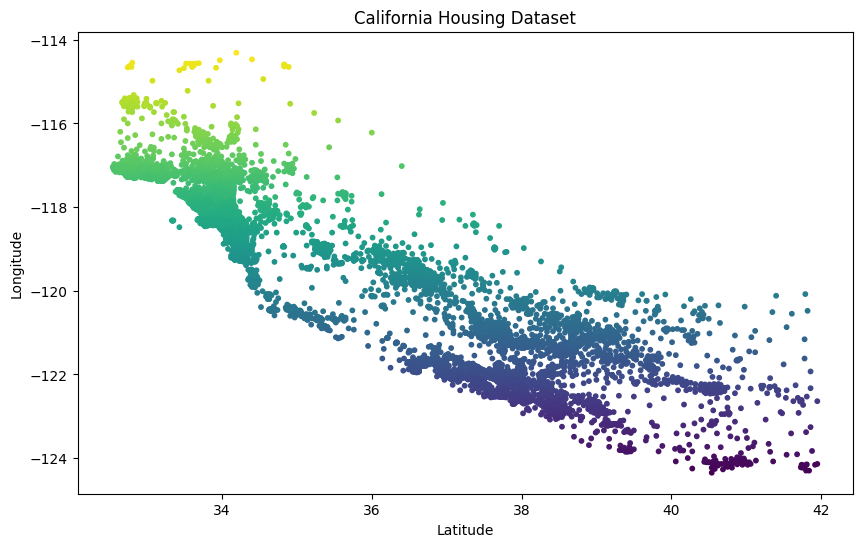

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=y, s=10, cmap=plt.cm.viridis)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('California Housing Dataset')
plt.show()

In [ ]:
data.isnull().sum() # no missing data

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
Y = data['MedHouseVal']
X = data.drop(columns = 'MedHouseVal')
X = X.to_numpy()
Y = Y.to_numpy()

In [ ]:
X.shape, Y.shape

((20640, 8), (20640,))

#### Model

Linear Regression

In [ ]:
model = []
mse = []
rmse = []
r2 = []

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score

Model = linear_model.LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
mse.append(mean_squared_error(Y_test, Y_pred))
r2.append(r2_score(Y_test, Y_pred))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]
Model : LinearRegression()
Root Mean square Error = 0.7455813830127749
Mean Square Error = 0.5558915986952422
R2 Score = 0.5757877060324524


Polynomial Regression

In [ ]:
# improvising polynomial regression

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2) # on testing different degrres of polinomial equation the best possible value is kept
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
Model = linear_model.LinearRegression()

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(f"{Model} with {poly}")
rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
mse.append(mean_squared_error(Y_test, Y_pred))
r2.append(r2_score(Y_test, Y_pred))

print(f"Model : {poly} with {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[0.5539974  1.75118566 3.49237927 ... 4.57436358 1.03279127 1.92414302]
Model : PolynomialFeatures() with LinearRegression()
Root Mean square Error = 0.6813967465119813
Mean Square Error = 0.4643015261571134
R2 Score = 0.6456819711504156


Ridge Regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score, root_mean_squared_error

Model = linear_model.Ridge(alpha=1.0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
mse.append(mean_squared_error(Y_test, Y_pred))
r2.append(r2_score(Y_test, Y_pred))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[0.71923978 1.76395141 2.70909238 ... 4.46864495 1.18785499 2.00912494]
Model : Ridge()
Root Mean square Error = 0.7455222779992692
Mean Square Error = 0.5558034669932196
R2 Score = 0.5758549611440138


Lasso Regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score, root_mean_squared_error

Model = linear_model.Lasso(alpha=1.0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
mse.append(mean_squared_error(Y_test, Y_pred))
r2.append(r2_score(Y_test, Y_pred))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[1.72559335 1.87880366 2.14751489 ... 2.8426924  1.95352989 1.95475031]
Model : Lasso()
Root Mean square Error = 0.9685214254184276
Mean Square Error = 0.9380337514945428
R2 Score = 0.2841671821008396


Elastic Net Regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score, root_mean_squared_error

Model = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
mse.append(mean_squared_error(Y_test, Y_pred))
r2.append(r2_score(Y_test, Y_pred))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[1.46966793 1.74416962 2.23145715 ... 3.39813146 1.87369056 1.85958549]
Model : ElasticNet()
Root Mean square Error = 0.8743887238506185
Mean Square Error = 0.7645556403971131
R2 Score = 0.41655189098028245


Descision Tree Regression

Model : DecisionTreeRegressor(max_depth=5, random_state=42)
Root Mean square Error = 0.0721555748149778
Mean Square Error = 0.005206426976879858
R2 Score = 0.9986908480396146


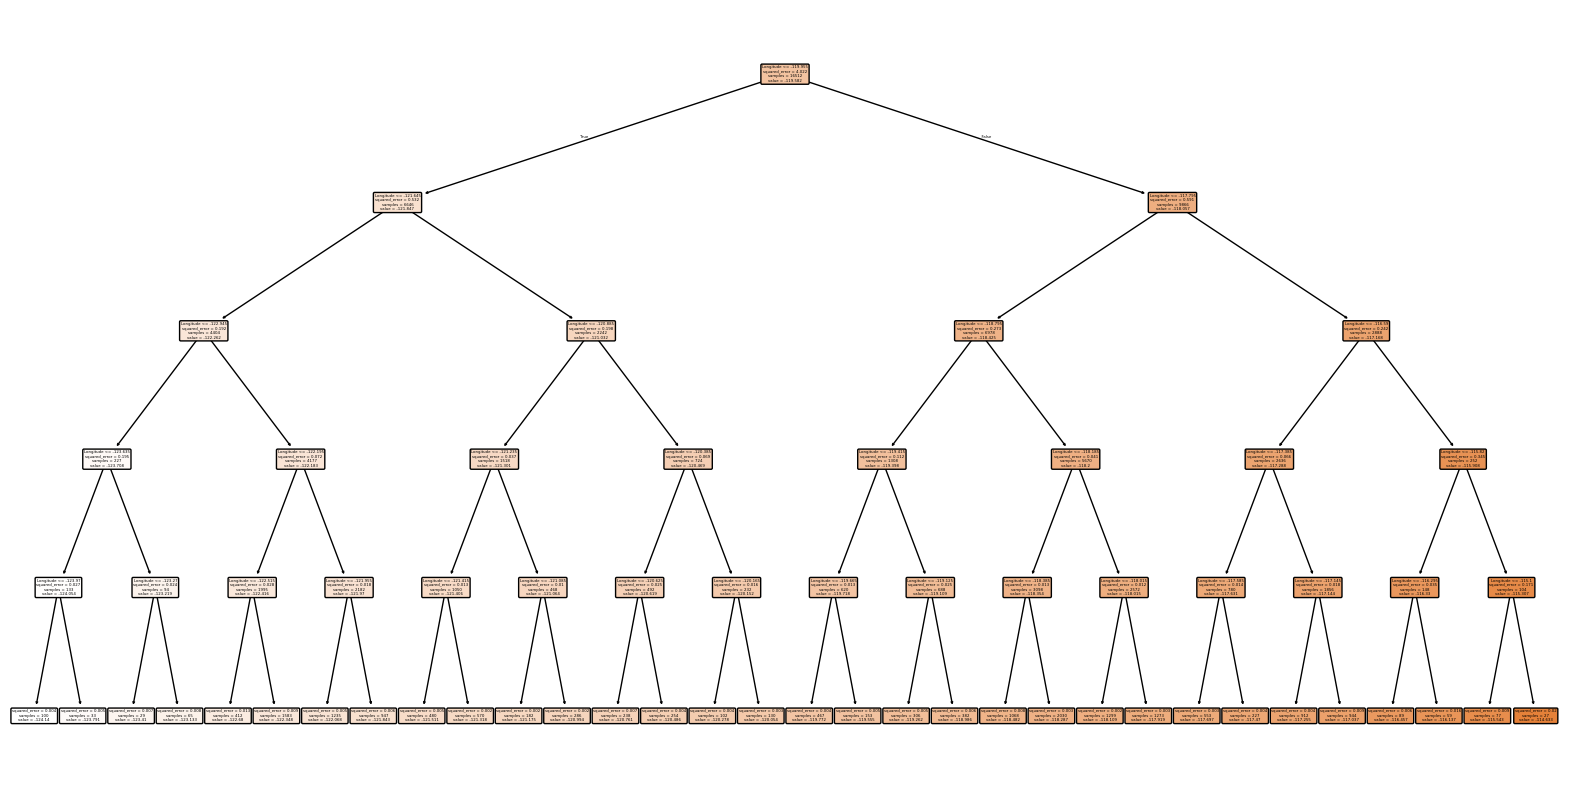

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model = DecisionTreeRegressor(max_depth=5, random_state=42)
Model.fit(X_train, Y_train)

Y_pred = Model.predict(X_test)

model.append(Model)
rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
mse.append(mean_squared_error(Y_test, Y_pred))
r2.append(r2_score(Y_test, Y_pred))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

plt.figure(figsize=(20, 10))
plot_tree(Model, feature_names=data.columns, filled=True, rounded=True)
plt.show()

Random Forest Regression

Model : RandomForestRegressor(max_depth=5, random_state=42)
Root Mean square Error = 0.06160013455454035
Mean Square Error = 0.0037945765771374763
R2 Score = 0.999045856710014


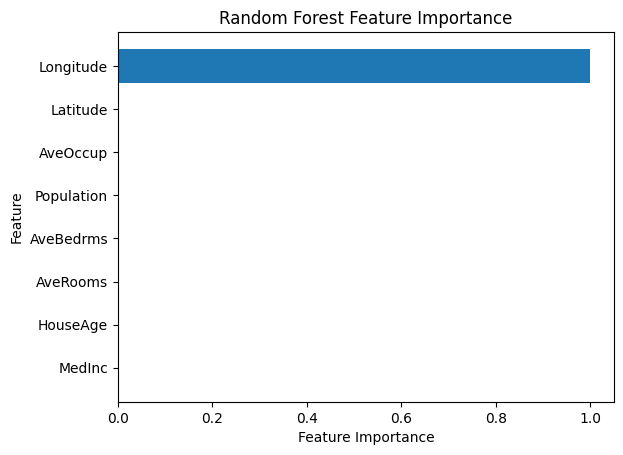

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model = RandomForestRegressor(max_depth=5, random_state=42)
Model.fit(X_train, Y_train)

Y_pred = Model.predict(X_test)

model.append(Model)
rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
mse.append(mean_squared_error(Y_test, Y_pred))
r2.append(r2_score(Y_test, Y_pred))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

importances = Model.feature_importances_
feature_names = data.drop(columns=['MedHouseVal']).columns
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

Tensorflow Model

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6070 - mae: 0.8910 - val_loss: 0.4883 - val_mae: 0.4995
Epoch 2/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4173 - mae: 0.4623 - val_loss: 0.4272 - val_mae: 0.4646
Epoch 3/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3858 - mae: 0.4423 - val_loss: 0.4115 - val_mae: 0.4542
Epoch 4/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3630 - mae: 0.4285 - val_loss: 0.3941 - val_mae: 0.4381
Epoch 5/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3468 - mae: 0.4195 - val_loss: 0.3818 - val_mae: 0.4322
Epoch 6/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3449 - mae: 0.4169 - val_loss: 0.3807 - val_mae: 0.4483
Epoch 7/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3344 - mae: 0.4116 - val_loss: 0.3613 - val_mae: 0.4236
Epoch 8/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3394 - mae: 0.4074 - val_loss: 0.3678 - val_mae: 0.4116
Epoch 9/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3107 

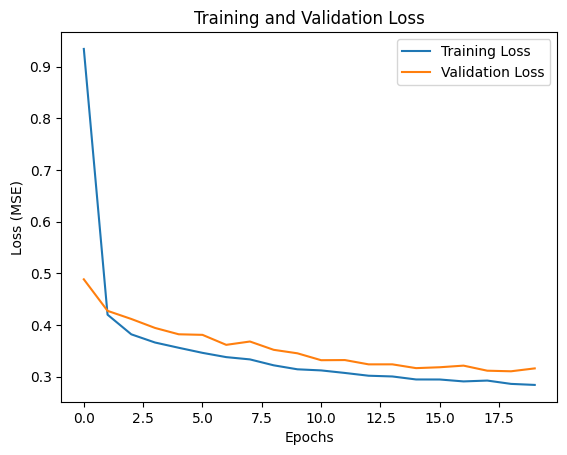

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

Model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = Model.fit(X_train, Y_train, validation_split=0.1, epochs=20, batch_size=32)

Y_pred = Model.predict(X_test).flatten()

model.append("Tensorflow Model")
rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
mse.append(mean_squared_error(Y_test, Y_pred))
r2.append(r2_score(Y_test, Y_pred))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

model = [str(m) for m in model]
ModelResultBoard = pd.DataFrame(np.array([model, mse, rmse, r2]).T, columns=['Model', 'MSE', 'RMSE', 'R2'])
ModelResultBoard.sort_values(by='R2', ascending=False)

,Model,MSE,RMSE,R2
6,"RandomForestRegressor(max_depth=5, random_stat...",0.0037945765771374763,0.06160013455454035,0.999045856710014
5,"DecisionTreeRegressor(max_depth=5, random_stat...",0.005206426976879858,0.0721555748149778,0.9986908480396146
7,Tensorflow Model,0.3017737272157113,0.5493393552401933,0.7697102719634796
1,LinearRegression() with PolynomialFeatures(),0.4643015261571134,0.6813967465119813,0.6456819711504156
2,Ridge(),0.5558034669932196,0.7455222779992692,0.5758549611440138
0,LinearRegression(),0.5558915986952422,0.7455813830127749,0.5757877060324524
4,ElasticNet(),0.7645556403971131,0.8743887238506185,0.41655189098028245
3,Lasso(),0.9380337514945428,0.9685214254184276,0.2841671821008396
